In [2]:
import pybaseball as pb 
import pandas as pd
from pybaseball.plotting import plot_bb_profile
import matplotlib.pyplot as plt
pb.cache.enable()


In [3]:
pb.playerid_lookup("Rogers", "Trevor")

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,rogers,trevor,669432,roget003,rogertr01,22286,2020.0,2021.0


In [4]:
# gather all the statcast for the pitcher
# use the key_mlbam value to identify the pitcher
rogers_statcast_df = pb.statcast_pitcher(start_dt="2019-01-01", end_dt='2021-4-28', player_id=669432)

Gathering Player Data


In [5]:
# just insure that a result came back   
rogers_statcast_df.shape

(1033, 92)

In [6]:
# look up Byron Buxton id
pb.playerid_lookup("Buxton", "Byron")


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,buxton,byron,621439,buxtb001,buxtoby01,14161,2015.0,2021.0


In [7]:
buxtox_statcast_df = pb.statcast_batter(start_dt="2019-01-01", end_dt='2021-4-28', player_id=621439)

Gathering Player Data


In [8]:
buxtox_statcast_df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FF,2021-04-28,91.9,2.09,6.20,"Buxton, Byron",621439,663531,double,hit_into_play,...,0,4,0,4,0,Infield shift,Standard,144.0,-0.028,0.943
1,CH,2021-04-28,82.8,2.21,5.97,"Buxton, Byron",621439,663531,NaN,blocked_ball,...,0,4,0,4,0,Infield shift,Standard,135.0,0.000,0.064
2,SL,2021-04-28,81.9,2.47,6.03,"Buxton, Byron",621439,663531,NaN,ball,...,0,4,0,4,0,Infield shift,Standard,319.0,-0.008,0.051
3,FF,2021-04-28,92.1,1.97,6.31,"Buxton, Byron",621439,663531,NaN,foul,...,0,4,0,4,0,Infield shift,Standard,144.0,0.000,-0.086
4,SL,2021-04-28,82.6,2.61,6.02,"Buxton, Byron",621439,663531,NaN,foul,...,0,4,0,4,0,Infield shift,Standard,302.0,0.000,-0.051


How to do a picher vs batter statcast search

In [9]:
pb.playerid_lookup("Nimmo", "Brandon")

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,nimmo,brandon,607043,nimmb001,nimmobr01,12927,2016.0,2021.0


In [10]:
# now filter down the dataframe to only pitches to the batter
# again using the key_mlbam value for the batter
# use .query and then take batters id in this case brandon nimmo
rogers_vs_nimmo = rogers_statcast_df.query("batter == 607043")

In [11]:
rogers_vs_nimmo.shape

(28, 92)

<AxesSubplot:ylabel='pitch_type'>

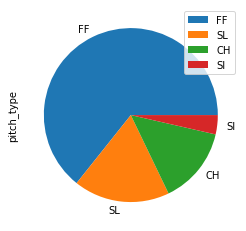

In [12]:
# for pitcher vs batter we can see how many of each pitch a batter has seen
# look furter into the plot method
rogers_vs_nimmo.pitch_type.value_counts().plot(kind="pie", legend=True)

In [13]:
asg = pb.all_star_game_logs()
print(asg)

        date  game_num day_of_week visiting_team visiting_team_league  \
0   19330706         0         Thu           NLS                   ML   
1   19340710         0         Tue           ALS                   ML   
2   19350708         0         Mon           NLS                   ML   
3   19360707         0         Tue           ALS                   ML   
4   19370707         0         Wed           NLS                   ML   
..       ...       ...         ...           ...                  ...   
85  20150714         0         Tue           ALS                   ML   
86  20160712         0         Tue           NLS                   ML   
87  20170711         0         Tue           ALS                   ML   
88  20180717         0         Tue           ALS                   ML   
89  20190709         0         Tue           NLS                   ML   

    visiting_team_game_num home_team home_team_league  home_team_game_num  \
0                        1       ALS          

In [14]:
asg.index
game0 = (asg.loc[0])
asg.to_csv('asg.csv')

In [15]:
verlander = pb.playerid_lookup('verlander', 'justin')
vID = pd.to_numeric(verlander.loc[0, 'key_mlbam'])
print(vID)

434378


In [16]:
verlanerDf = pb.statcast_pitcher(start_dt="2010-01-01", end_dt='2021-01-01', player_id= vID)
verlanerDf.shape 

Gathering Player Data


C:\Users\jacotayl\AppData\Local\Programs\Python\Python39\lib\site-packages\pybaseball\cache\cache.py:58: DtypeWarning: Columns (87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  result = func(*args, **kwargs)
C:\Users\jacotayl\AppData\Local\Programs\Python\Python39\lib\site-packages\pybaseball\cache\cache.py:58: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  result = func(*args, **kwargs)


(37555, 92)

In [17]:
verlanerDf.head

<bound method NDFrame.head of       pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0             SL  2015-10-03           87.5          -1.97           6.19   
1             CU  2015-10-03           81.1          -1.94           6.45   
2             FF  2015-10-03           95.3          -1.47           6.36   
3             FF  2015-10-03           96.2          -1.63           6.34   
4             FF  2015-10-03           95.7          -1.72           6.28   
...          ...         ...            ...            ...            ...   
15563         SL  2016-04-05           83.8          -1.71           6.51   
15564         FF  2016-04-05           91.3          -1.42           6.58   
15565         FF  2016-04-05           90.9          -1.44           6.51   
15566         FF  2016-04-05           90.6          -1.72           6.44   
15567         FF  2016-04-05           91.1          -1.65           6.50   

             player_name  batter  pitcher    

In [18]:
#rogers_vs_nimmo = rogers_statcast_df.query("batter == 607043")
# lets find verlander vs cabrea
pb.playerid_lookup(last='cabrera', first='miguel')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,cabrera,miguel,408234,cabrm001,cabremi01,1744,2003.0,2021.0


In [19]:
verlander_vs_cabrera = verlanerDf.query("batter == 408234")
verlander_vs_cabrera.shape

(13, 92)

<AxesSubplot:ylabel='pitch_type'>

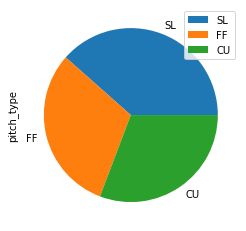

In [20]:
# rogers_vs_nimmo.pitch_type.value_counts().plot(kind="pie", legend=True)
verlander_vs_cabrera.pitch_type.value_counts().plot(kind="pie", legend=True)

In [21]:
pitchCounts = verlander_vs_cabrera.pitch_type.value_counts()

Gathering Player Data


C:\Users\jacotayl\AppData\Local\Programs\Python\Python39\lib\site-packages\pybaseball\plotting.py:114: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = sub_data[sub_data['events'].notna()][sub_data['hc_x'].notna()][sub_data['hc_y'].notna()]


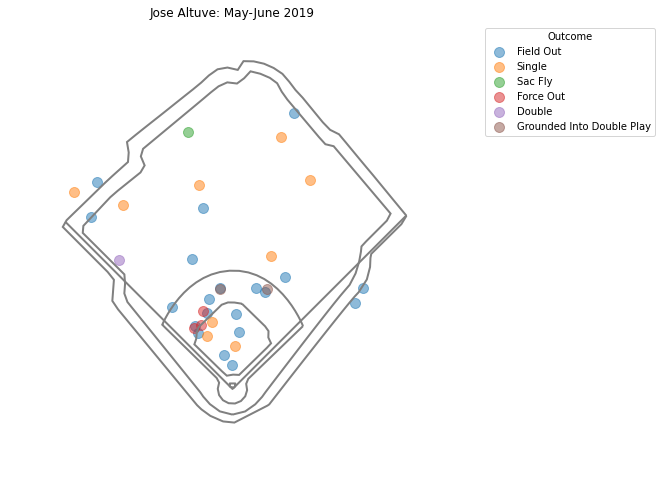

<Axes:title={'center':'Jose Altuve: May-June 2019'}>

In [22]:
data = pb.statcast_batter('2019-05-01', '2019-07-01', 514888)
sub_data = data[data['home_team'] == 'HOU']
pb.spraychart(sub_data, 'astros', title='Jose Altuve: May-June 2019')

In [23]:
single = verlander_vs_cabrera.loc[:, 'game_pk']


In [24]:
verlander_vs_cabrera_statcast = pb.statcast_single_game("565666")
verlander_vs_cabrera_statcast.shape

(242, 92)

In [25]:
v_c_data = []
for index, row in verlander_vs_cabrera_statcast.iterrows():
    if (row['batter'] == 408234 and row['pitcher'] == vID):
        v_c_data.append(row)
    

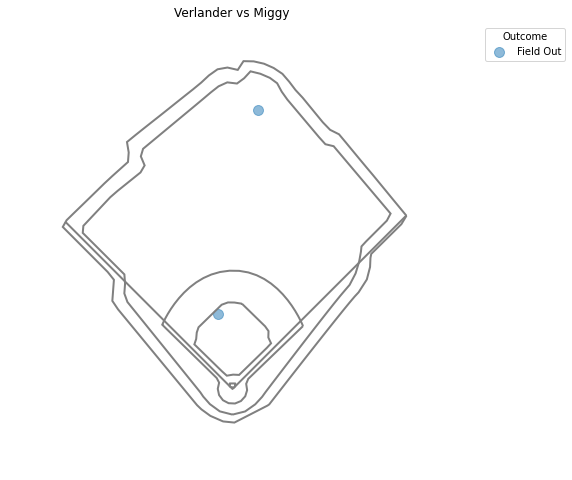

<Axes:title={'center':'Verlander vs Miggy'}>

In [26]:
pb.spraychart(verlander_vs_cabrera, 'astros', "Verlander vs Miggy")

Gathering Player Data


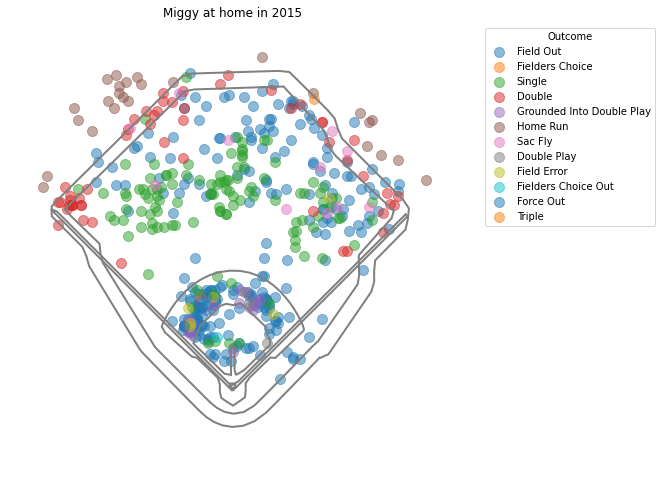

<Axes:title={'center':'Miggy at home in 2015'}>

In [27]:
# get data for miggys tripple crown year 408234
miggy_data = pb.statcast_batter(start_dt="2014-01-01", end_dt='2015-01-01', player_id = 408234)
miggy_data.shape
pb.spraychart(miggy_data, 'tigers', "Miggy at home in 2015")


In [28]:
miggy_data.to_csv('miggyCSV')

# Filtering using loc
First argument is what row (accepts ranges) and second arguement is  (accepts ranges)

In [29]:
# gets one row
miggy_data.loc[0, :]
# should be one column
miggy_data.iloc[:, 1]

0       2014-10-05
1       2014-10-05
2       2014-10-05
3       2014-10-05
4       2014-10-05
           ...    
2565    2014-03-31
2566    2014-03-31
2567    2014-03-31
2568    2014-03-31
2569    2014-03-31
Name: game_date, Length: 2570, dtype: object

# Filtering using .loc

Selecting single or multiple rows using .loc index selections with pandas. Note that the first example returns a series, and the second returns a DataFrame. You can achieve a single-column DataFrame by passing a single-element list to the .loc operation.

When using the .loc indexer, columns are referred to by names using lists of strings, or “:” slices.

In [30]:
miggy_data.loc[[0, 1]]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,SL,2014-10-05,87.0,-1.40,5.84,"Cabrera, Miguel",408234,502032,field_out,hit_into_play,...,2,2,0,0,2,NaN,NaN,NaN,-0.035,-0.221
1,SL,2014-10-05,87.2,-1.42,5.83,"Cabrera, Miguel",408234,502032,fielders_choice,hit_into_play,...,0,0,0,0,0,NaN,NaN,NaN,0.039,-0.223


In [31]:
# gives us the pitcher for each pitch thrown
miggy_data.loc[[0,1], 'pitcher']

0    502032
1    502032
Name: pitcher, dtype: int64

Lets filter by FF (4-seam fastball)

In [32]:
ff2015 = miggy_data.loc[miggy_data['pitch_type'] == 'FF']
ff2015.describe()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
count,912.000000,912.000000,912.000000,912.0,912.000000,0.0,0.0,0.0,0.0,912.000000,...,912.000000,912.000000,912.000000,912.000000,912.000000,0.0,0.0,0.0,912.000000,912.000000
mean,92.966667,-0.680702,5.906743,408234.0,483566.907895,NaN,NaN,NaN,NaN,8.974781,...,1.841009,2.035088,1.703947,1.898026,1.841009,NaN,NaN,NaN,-0.000884,0.017115
std,2.991515,1.524977,0.340786,0.0,63968.369633,NaN,NaN,NaN,NaN,4.166726,...,2.487719,2.625735,2.256851,2.419169,2.487719,NaN,NaN,NaN,0.023941,0.227922
min,80.900000,-4.180000,3.360000,408234.0,136600.000000,NaN,NaN,NaN,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,-0.296000,-0.776000
25%,91.200000,-1.710000,5.700000,408234.0,448306.000000,NaN,NaN,NaN,NaN,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,-0.045000
50%,93.100000,-1.100000,5.900000,408234.0,476454.000000,NaN,NaN,NaN,NaN,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000
75%,94.900000,-0.195000,6.130000,408234.0,519085.000000,NaN,NaN,NaN,NaN,13.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,NaN,NaN,NaN,0.000000,0.033000
max,100.700000,2.830000,6.890000,408234.0,612672.000000,NaN,NaN,NaN,NaN,14.000000,...,12.000000,14.000000,12.000000,14.000000,12.000000,NaN,NaN,NaN,0.174000,1.781000


# Goals for tommorw
<ol>
<li> Lets make a spray chart of miggys hits on FF (filter out NaN on events??)
<li> Then take Degroms 2021 and try to make some plots :)
</ol>

C:\Users\jacotayl\AppData\Local\Programs\Python\Python39\lib\site-packages\pybaseball\plotting.py:114: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = sub_data[sub_data['events'].notna()][sub_data['hc_x'].notna()][sub_data['hc_y'].notna()]


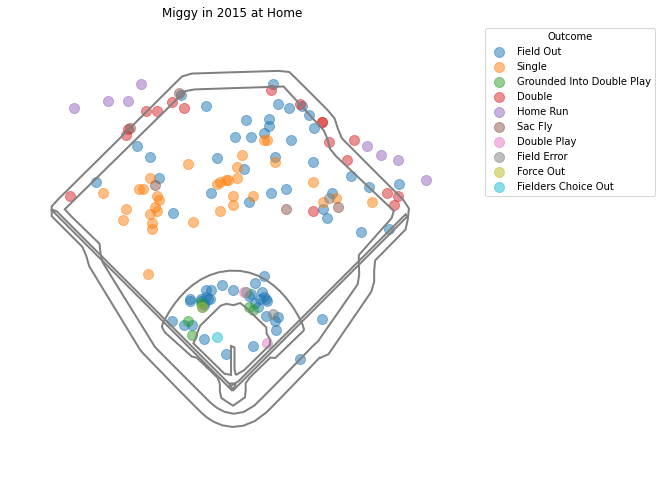

<Axes:title={'center':'Miggy in 2015 at Home'}>

In [33]:
# use loc to logically filter
# not necessary but just experimenting
pb.spraychart(ff2015.loc[ff2015['events'].isnull() != True], 'tigers', 'Miggy in 2015 at Home')

Text(0, 0.5, 'Freqency')

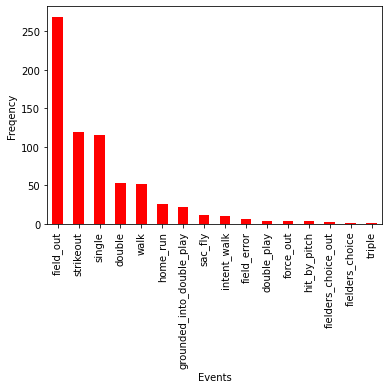

In [34]:
# more plots
miggy_bar = miggy_data.events.value_counts().plot(kind='bar',x='Event', y='Frequency', color='red')
miggy_bar.set_xlabel('Events')
miggy_bar.set_ylabel('Freqency')

Text(0.5, 1.0, 'Frequency of Miggys Homeruns based on Pitch Type')

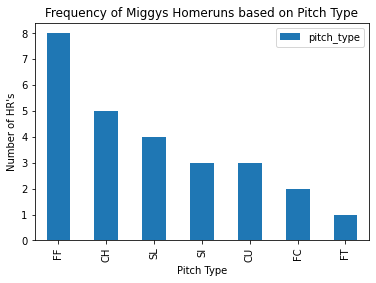

In [35]:
# distance of Miggys Homeruns in 2015 scatterplot? not available
# instead lets do pitches he hit hrs off of
# filter to homeruns
miggyHRs = miggy_data.loc[miggy_data['events'] == 'home_run']
hrPlot = miggyHRs.pitch_type.value_counts().plot(kind='bar',x='Pitch Type', y='# of HRs', legend=True)
hrPlot.set_xlabel('Pitch Type')
hrPlot.set_ylabel("Number of HR's")
hrPlot.set_title("Frequency of Miggys Homeruns based on Pitch Type")

In [36]:
# make same plot for miggys whole career
miggyC = pb.statcast_batter(start_dt='2003-01-01', end_dt='2021-10-01', player_id=408234)

Gathering Player Data


C:\Users\jacotayl\AppData\Local\Programs\Python\Python39\lib\site-packages\pybaseball\cache\cache.py:58: DtypeWarning: Columns (0,43,78) have mixed types.Specify dtype option on import or set low_memory=False.
  result = func(*args, **kwargs)


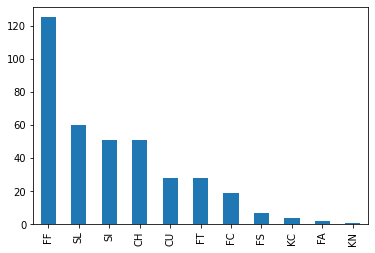

In [37]:
#lets filter and plot hr for his carerr!
cHR = miggyC.loc[miggyC["events"] == 'home_run'].pitch_type.value_counts().plot(kind="bar")

In [38]:
hrs = miggyC.loc[miggyC["events"] == 'home_run']
total_hrs = hrs.pitch_type.value_counts().sum() + hrs["pitch_type"].isnull().sum()
print(total_hrs)

515


Text(0.5, 1.0, 'Pitches hit for HR by Miggy')

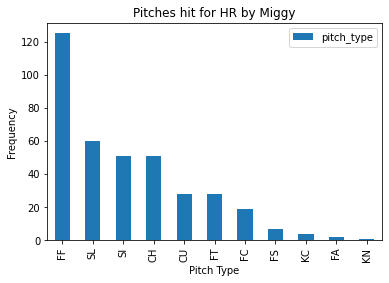

In [39]:
# plot for Home Runs we have a pitch type for
hr_plot_miggy = hrs.pitch_type.value_counts().plot(kind='bar', legend=True)
hr_plot_miggy.set_xlabel('Pitch Type')
hr_plot_miggy.set_ylabel('Frequency')
hr_plot_miggy.set_title('Pitches hit for HR by Miggy')

# Degrom Time
<ul>
<li> Find ID
<li> Then get data lets analyze 2021 before injury
<li> Explore with Plots

In [40]:
pb.playerid_lookup(last="degrom", first='jacob')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,degrom,jacob,594798,degrj001,degroja01,10954,2014.0,2021.0


In [41]:
jacob2021 = pb.statcast_pitcher(start_dt='2021-01-01', end_dt='2021-10-01', player_id= 594798)

Gathering Player Data


In [42]:
#plot strikeout pitches
# filter
strikeouts_degrom = jacob2021.loc[jacob2021["events"] == "strikeout"]


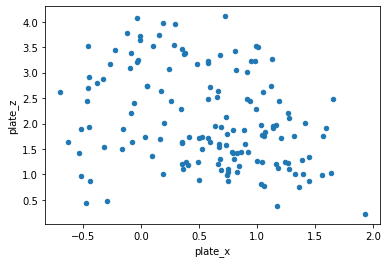

In [49]:
ks = strikeouts_degrom.plot.scatter(x='plate_x', y='plate_z')



# Next Time
<ol>
<li> Use plate_x and plate_z to plot where pitches were in the strike zoone
    <ul>
    <li> Use sz_top and sz_bot (both in feet) find average strike zone and then set as x and y axis
    </ul>
<li> Maybe some team analysis (Tigers world series teams??)
<li> See if World Series data is there
</ol>

In [52]:
def getXInches(pitches):
    inches = pitches['plate_x'] * 12
    return inches, pitches['pitch_type']
plate_x_inches = [x*12 for x, y in zip(strikeouts_degrom['plate_x'], strikeouts_degrom['pitch_type'])]
plate_z_inches = [x*12 for x, y in zip(strikeouts_degrom['plate_z'], strikeouts_degrom['pitch_type'])]


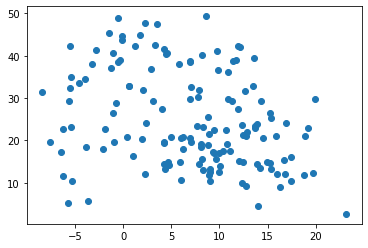

In [51]:
plt.scatter(plate_x_inches, plate_z_inches)
plt.show()